<a href="https://colab.research.google.com/github/tanveerkn/Reputation-Score-Model/blob/master/twiteer_reputation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import pandas as pd
pd.set_option('display.max_columns', None)
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import seaborn as sb
import matplotlib.pyplot as plt
plt.rcParams['axes.grid'] = False
from sklearn import metrics
from sklearn import linear_model
from sklearn.neural_network import MLPRegressor
from sklearn.svm import SVR
import sys
import numpy as np
np.set_printoptions(threshold=sys.maxsize)
np.set_printoptions(suppress=True)
from keras.callbacks import ModelCheckpoint
from keras.models import Sequential
from keras.layers import Dense, Activation, Flatten
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler

Using TensorFlow backend.


In [0]:
file=('data_set.csv')
features = pd.read_csv(file)
# corr = features.corr()
# print("Correlation of features with the reputation score \n")
# print (corr['Reputation_score'])
features=features.iloc[ : ,2:]


In [0]:
# X=features.iloc[:,:-1]
# X=X.clip(features.quantile(0.20), features.quantile(0.80), axis=1)
# y=features.iloc[:,-1].values
# col = [x for x in list(X) if x not in ['id_str', 'screen_name','Social_reputation', 'like_hindex','retweet_hindex', 'Content_Score', 'Context_score']]
# X=X[col].values

model = []
accuracy = []
error= []
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# sc_X=StandardScaler()
# X_train=sc_X.fit_transform(X_train)
# X_test=sc_X.transform(X_test)

# sc_y=StandardScaler()
# y_train=y_train.reshape (-1,1)
# y_test=y_test.reshape (-1,1)
# y_train=sc_y.fit_transform(y_train)
# # y_train = y_train.reshape (-1,1)
# y_test=sc_y.transform(y_test)
# # y_test = y_test.reshape (-1,1)
# y_test


In [0]:
def make_train_test_set(df, train_test_split_prct, clipping_quantile):
    msk = np.random.rand(len(df)) < train_test_split_prct
    train_df = df[msk].copy()
    
    test_df = df[~msk].copy()
    

    thres = train_df.quantile(clipping_quantile)
    # test_qu=train_df.quantile(clipping_quantile)


    fet_list = [x for x in list(df) if x not in ["symbols_ratio"]]

    for col in fet_list:

        if col:
#           train_df[col] = train_df[col]
#           test_df[col] = test_df[col]
          train_df[col] = train_df[col] / thres[col]
#           print(train_df)
          test_df[col] = test_df[col] / thres[col]
#           print(test_df)
    train_df.iloc[:,:].clip(0,1)
    
    test_df.iloc[:,:].clip(0,1)
    

    # , 'statuses_count', 'followers_count', 'listed_count', 'friends_count', 'has_url', 'mention_by_others', 'retweet_ratio', 'liked_ratio', 'orig_content_ratio', 'hashtag_ratio', 'urls_ratio', 'symbols_ratio', 'mentions_ratio']]

    cols = [col for col in list(df) if col not in ['Social_reputation','retweet_hindex', 'like_hindex', 'Content_Score', 'Context_score', 'Reputation_score','friends_count']]

    y_train = train_df['Reputation_score'].values
    # print(y_train)

    y_test = test_df['Reputation_score'].values
    # print(y_test)
    X_train = train_df[cols].values

    X_test = test_df[cols].values

    return X_train, X_test, y_train, y_test, thres.transpose(), fet_list


In [0]:
X_train, X_test, y_train, y_test, thres, fet_list = make_train_test_set(features, 0.8,1)

In [0]:
array_2D = X_train[0:]
array_2D

# Multi Layer Perceptron

Linear
SVR(C=100, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='auto',
    kernel='linear', max_iter=-1, shrinking=True, tol=0.001, verbose=False)


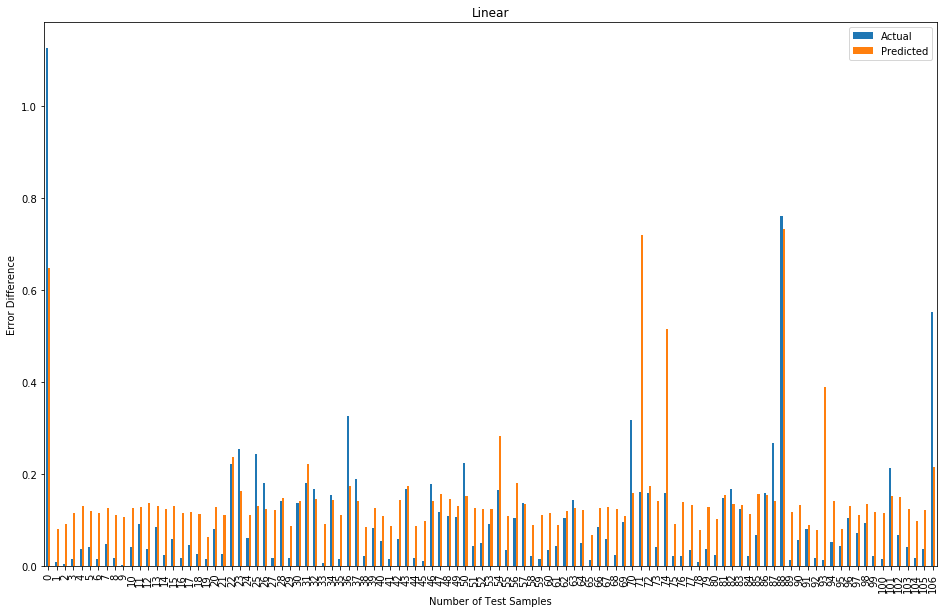

Mean Absolute Error: 0.08225492951384644
Mean Squared Error: 0.013838212204896793
Root Mean Squared Error: 0.11763593075628208
Comparision of Models ....

Poly
SVR(C=100, cache_size=200, coef0=1, degree=3, epsilon=0.1, gamma='auto',
    kernel='poly', max_iter=-1, shrinking=True, tol=0.001, verbose=False)


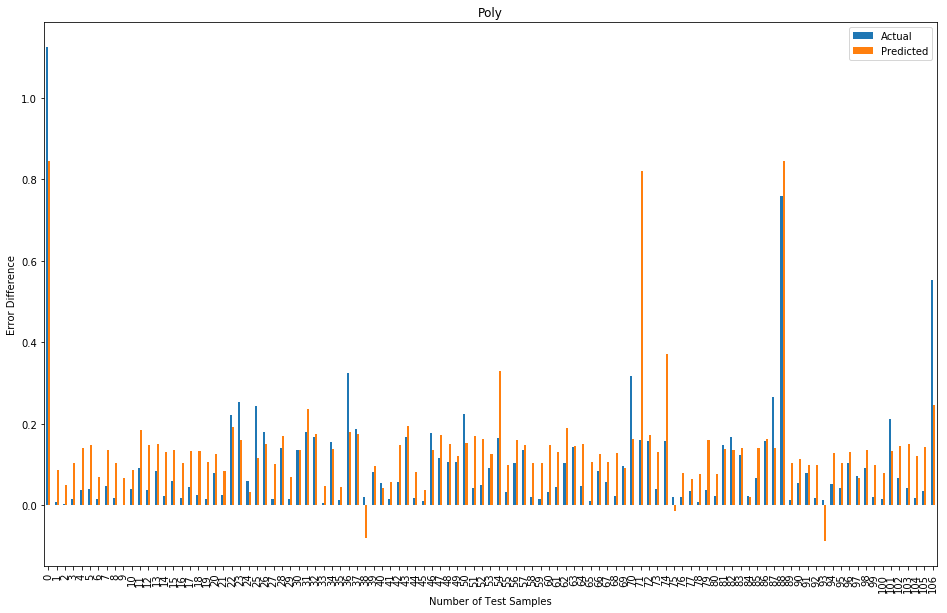

Mean Absolute Error: 0.07603909061946942
Mean Squared Error: 0.011533323922512335
Root Mean Squared Error: 0.10739331414251231
Comparision of Models ....

RBF
SVR(C=100, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma=0.1,
    kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)


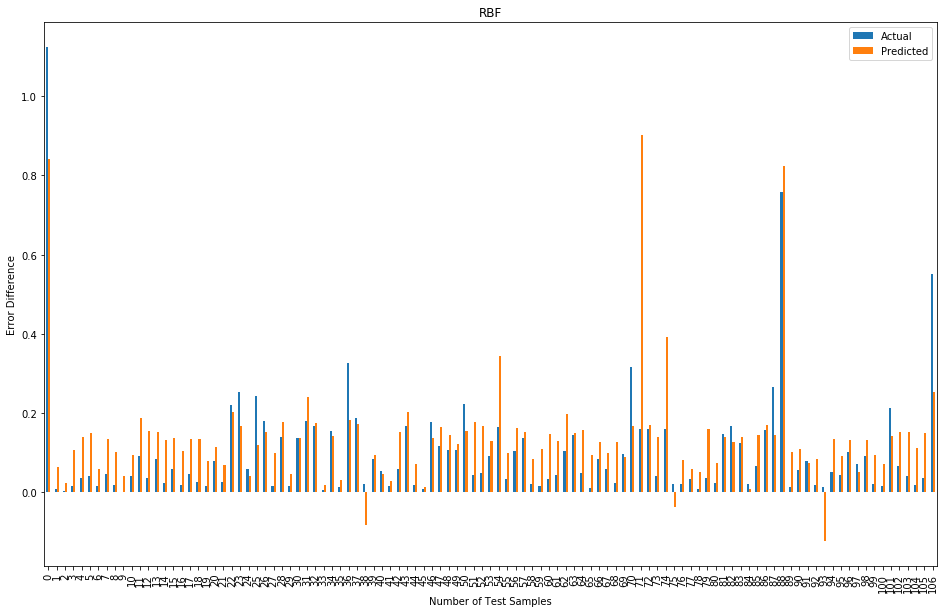

Mean Absolute Error: 0.07442819454873834
Mean Squared Error: 0.012531564070781837
Root Mean Squared Error: 0.11194446869221292
Comparision of Models ....


 Model Name 			 MSE_MLP 

Linear              		 0.01384		0.35427

Poly                		 0.01153		0.46182

RBF                 		 0.01253		0.41524



In [0]:

from matplotlib import pyplot
svr = MLPRegressor(
    hidden_layer_sizes=(50,),  activation='relu', solver='adam', alpha=0.001, batch_size='auto',
    learning_rate='constant', learning_rate_init=0.01, power_t=0.5, max_iter=100, shuffle=True,
    random_state=9, tol=0.0001, verbose=False, warm_start=False, momentum=0.9, nesterovs_momentum=True,
    early_stopping=False, validation_fraction=0.1, beta_1=0.9, beta_2=0.999, epsilon=1e-08)


svr_dict  = {"Linear":  SVR(kernel='linear', C=100, gamma='auto'),
             "Poly": SVR(kernel='poly', C=100, gamma='auto', degree=3, epsilon=.1, coef0=1),
             "RBF": SVR(kernel='rbf', C=100, gamma=0.1, epsilon=.1),
             
              }

# mse_svr_list = []
# lets run the experiment multiple times
MSE_svr = {}
Var_svr = {}
MAE_svr={}
RMSE={}

# #
for key in svr_dict.keys():
  print(key)
  svr = svr_dict[key]
  print(svr)
  # Train the model using the training sets
  history=svr.fit(X_train, y_train)
#   print(svr.summary())
  y_pred_svr = svr.predict(X_test)
  model.append(key)

  MSE_svr[key] = metrics.mean_squared_error(y_test, y_pred_svr)
  MAE_svr[key]=metrics.mean_absolute_error(y_test, y_pred_svr)
  RMSE[key]=np.sqrt(metrics.mean_squared_error(y_test, y_pred_svr))
  Var_svr[key] = svr.score(X_test, y_test)
  accuracy.append(Var_svr[key])
  error.append(MSE_svr[key])
  df = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_pred_svr.flatten()})
  df1 = df
  df1.plot(kind='bar', figsize=(16, 10))
#   plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
#   plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
  plt.ylabel('Error Difference')
  plt.xlabel('Number of Test Samples')
  plt.title('{}'.format(key))
  # plt.scatter(X_test, y_test, color='gray')
  # plt.plot(X_test, y_pred_svr, color='red', linewidth=2)
  plt.savefig(key+'.png', dpi=300, bbox_inches='tight')
  plt.show()
  
#   pyplot.title('Loss / Mean Squared Error')
#   pyplot.plot(history.history['loss'], label='train')
#   pyplot.plot(history.history['val_loss'], label='test')
#   pyplot.legend()
#   pyplot.show()
  print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred_svr))
  print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred_svr))
  print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred_svr)))
  print("Comparision of Models ....\n")

print("\n Model Name \t\t\t MSE_MLP \n")
for key in svr_dict.keys():
  print("{0:20}\t\t {1:.5f}\t\t{2:.5f}\n".format(key, MSE_svr[key],Var_svr[key]))


In [0]:

svr_dict['Linear'].predict(X_test[31:35])

array([0.22139976, 0.14531188, 0.09141595, 0.14350696])

In [0]:
svr_dict['Poly'].predict(X_test[31:35])

array([0.23653797, 0.17620688, 0.04666737, 0.13806946])

In [0]:
svr_dict['RBF'].predict(X_test[31:35])

array([0.23953974, 0.17414475, 0.01901402, 0.14090027])

In [0]:
print(y_test[31:35])

[0.1799668  0.16704444 0.00665629 0.15470278]


In [0]:
print(metrics.mean_squared_error(y_test, y_pred_svr))

0.09268742273934914


Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_21 (Dense)             (None, 128)               1664      
_________________________________________________________________
dense_22 (Dense)             (None, 256)               33024     
_________________________________________________________________
dense_23 (Dense)             (None, 256)               65792     
_________________________________________________________________
dense_24 (Dense)             (None, 256)               65792     
_________________________________________________________________
dense_25 (Dense)             (None, 1)                 257       
Total params: 166,529
Trainable params: 166,529
Non-trainable params: 0
_________________________________________________________________
Train on 393 samples, validate on 107 samples
Epoch 1/200
393/393 [==============================] - 1s 2ms/step -

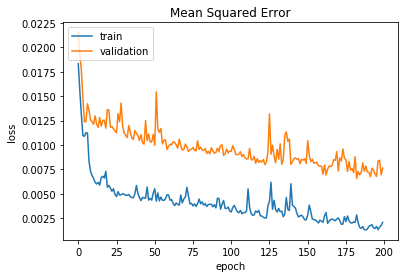

In [0]:

# ######################Deep Neural network for regressor################
#
NN_model = Sequential()

# Layer: Input  :
NN_model.add(Dense(128, kernel_initializer='normal',input_dim = X_train.shape[1], activation='relu'))

# Layer: Hidden :
NN_model.add(Dense(256, kernel_initializer='normal',activation='relu'))
NN_model.add(Dense(256, kernel_initializer='normal',activation='relu'))
NN_model.add(Dense(256, kernel_initializer='normal',activation='relu'))

# Layer: Output :
NN_model.add(Dense(1, kernel_initializer='normal',activation='linear'))

# Network Compilation:
NN_model.compile(loss='mean_squared_error', optimizer='adam', metrics=['mean_squared_error', 'mean_absolute_error' ])
NN_model.summary()


########check points####################
checkpoint_name = 'Weights-{epoch:03d}--{val_loss:.5f}.hdf5'
checkpoint = ModelCheckpoint(checkpoint_name, monitor='val_loss', verbose = 1, save_best_only = True, mode ='auto')
callbacks_list = [checkpoint]

history=NN_model.fit(X_train, y_train, epochs=200, batch_size=32, validation_data=(X_test,y_test), callbacks=callbacks_list)
print(len(NN_model.predict(X_test)))
# print(NN_model.history.keys())
# "Loss"
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Mean Squared Error')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.savefig('MSEDNN.png', dpi=300, bbox_inches='tight')
plt.show()
# plt.savefig('mse.png')


# ##########MLP regressor#########################




############################################################################################

In [0]:
NN_model.predict(X_test[31:35])

array([[0.12074946],
       [0.07912192],
       [0.01113656],
       [0.10921122]], dtype=float32)

In [0]:
print(y_test[31:35])

[0.1799668  0.16704444 0.00665629 0.15470278]


In [0]:
#####################Plotting graph for socre of different models###############################


index = np.arange(len(model))
plt.bar(index,accuracy,alpha=1,color='blue')
plt.ylabel('Accuracy')
plt.xlabel('Different Machine Learning Models')
plt.xticks(index,model)
plt.title("Models Comparison")
plt.show()
#######feautre correlation visualizing using seaborn###############

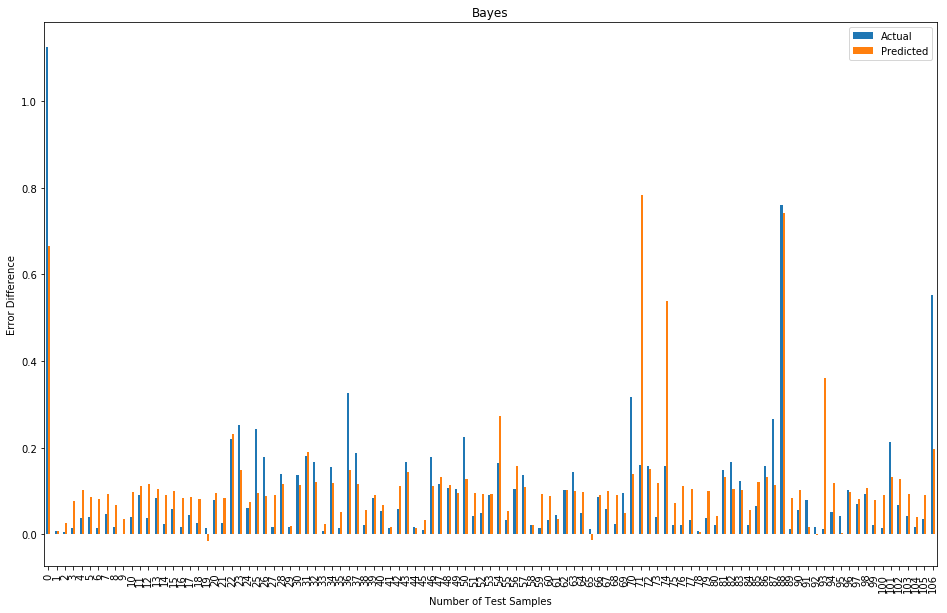

Mean Absolute Error: 0.06314511660763662
Mean Squared Error: 0.012393032115317679
Root Mean Squared Error: 0.1113239961343361
Comparision of Models ....


 Model Name 			 MSE_REG 



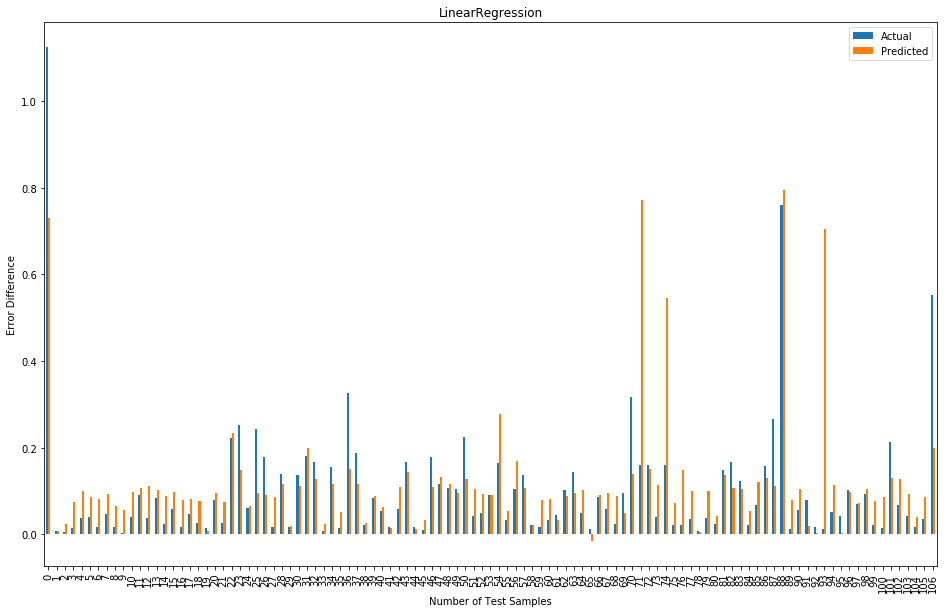

Mean Absolute Error: 0.06501507878544646
Mean Squared Error: 0.015105318861364844
Root Mean Squared Error: 0.122903697508923
Comparision of Models ....


 Model Name 			 MSE_REG 



/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


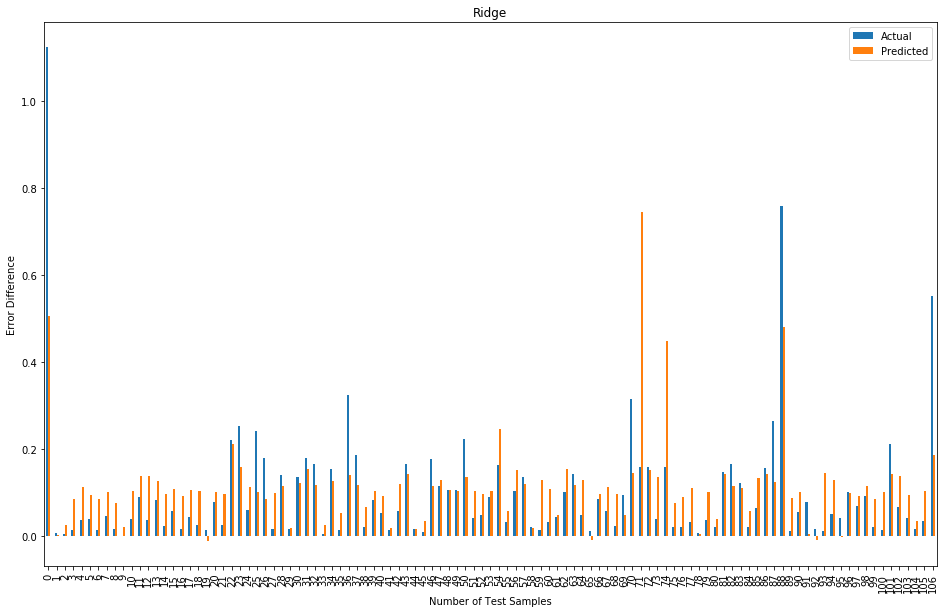

Mean Absolute Error: 0.06833969128406327
Mean Squared Error: 0.013287487466662345
Root Mean Squared Error: 0.11527136446950884
Comparision of Models ....


 Model Name 			 MSE_REG 



/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


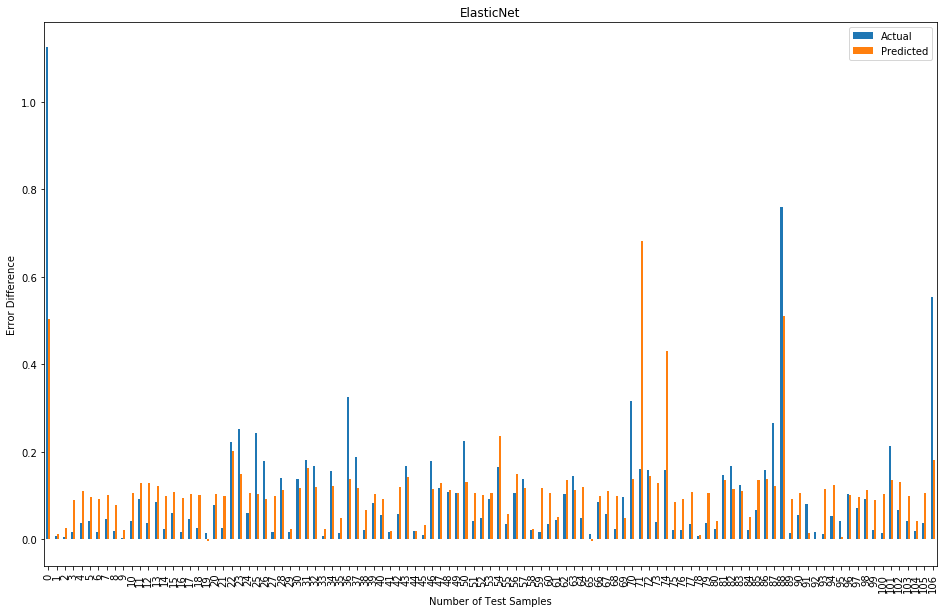

Mean Absolute Error: 0.06661580258292249
Mean Squared Error: 0.012314281300573153
Root Mean Squared Error: 0.11096973146121042
Comparision of Models ....


 Model Name 			 MSE_REG 

Bayes               		 0.01239		0.42170

LinearRegression    		 0.01511		0.29514

Ridge               		 0.01329		0.37996

ElasticNet          		 0.01231		0.42538



In [0]:

regr_dict  = {'Bayes': linear_model.BayesianRidge(),
              'LinearRegression': linear_model.LinearRegression(),
              'Ridge': linear_model.RidgeCV(alphas=[0.1, 0.5, 1.0, 2.0, 5.0, 10.0], cv=5,),
              'ElasticNet': linear_model.ElasticNetCV()}
mse__reg_list = []
  # lets run the experiment multiple times
MSE_reg = {}
Var_reg = {}
MAE_svr={}
RMSE={}
for key in regr_dict.keys():
#   print(key)
  regr = regr_dict[key]
#   # regr= linear_model.LinearRegression()
#       # Train the model using the training sets
  regr.fit(X_train, y_train)
  model.append(key)


  y_pred_reg = regr.predict(X_test)
      # print('coefficient',regr.coef_)
      # print('intercept',regr.intercept_)

  MSE_reg[key] = metrics.mean_squared_error(y_test, y_pred_reg)
  MAE_svr[key]=metrics.mean_absolute_error(y_test, y_pred_reg)
  RMSE[key]=np.sqrt(metrics.mean_squared_error(y_test, y_pred_reg))
  Var_reg[key] = regr.score(X_test, y_test)
  accuracy.append(Var_reg[key])
  error.append(MSE_reg[key])
  df = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_pred_reg.flatten()})
  df2 = df
  df2.plot(kind='bar', figsize=(16, 10))
#   plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
#   plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
  plt.ylabel('Error Difference')
  plt.xlabel('Number of Test Samples')
  plt.title('{}'.format(key))
      # plt.scatter(X_test, y_test, color='gray')
      # plt.plot(X_test, y_pred_svr, color='red', linewidth=2)
  plt.savefig(key+'.png', dpi=300, bbox_inches='tight')

  plt.show()
  print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred_reg))
  print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred_reg))
  print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred_reg)))
  print("Comparision of Models ....\n")

  print("\n Model Name \t\t\t MSE_REG \n")
#   for key in regr_dict.keys():
#     print("{0:20}\t\t {1:.5f}\t\t{2:.5f}\n".format(key, MSE_reg[key],Var_reg[key]))
for key in regr_dict.keys():
  print("{0:20}\t\t {1:.5f}\t\t{2:.5f}\n".format(key, MSE_reg[key],Var_reg[key]))


In [0]:
print(y_test[31:35])

[0.1799668  0.16704444 0.00665629 0.15470278]


In [0]:
regr_dict['LinearRegression'].predict(X_test[31:35])

array([0.19856534, 0.12747546, 0.02286176, 0.11705124])

In [0]:
regr_dict['Bayes'].predict(X_test[31:35])

array([0.19006085, 0.12131227, 0.02413803, 0.11847513])

In [0]:
regr_dict['Ridge'].predict(X_test[31:35])

array([0.15432589, 0.11791756, 0.02529318, 0.12796064])

In [0]:
regr_dict['ElasticNet'].predict(X_test[31:35])

array([0.16284297, 0.11841211, 0.02391849, 0.12185372])